In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("school_shooting_data.csv")
df["Year"] = df.Date.str[-4:]

In [3]:
df["Killed (includes shooter)"].value_counts()

0     969
1     505
2      58
3      12
6       3
5       3
10      2
28      1
17      1
15      1
4       1
Name: Killed (includes shooter), dtype: int64

In [14]:
high_death_count_df = df[df["Killed (includes shooter)"] > 0]
wounded_df = df[df["Wounded"] > 0]
premeditated_df = df[df["Pre-planned school attack"] == "Yes"]

In [15]:
def plot_annual_readings(df, range_params, title, xlabel, ylabel, filename):
    vals = df["Year"].value_counts()
    vals = vals.sort_index(ascending=True)
    x = vals.index
    y = vals.values
    x = np.array([int(u) for u in x])
    y = np.array([int(u) for u in y])
    plt.style.use('ggplot')
    plt.plot(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.yticks(range(range_params[0], range_params[1], range_params[2]))
    plt.savefig(filename, bbox_inches='tight')
    return m



0.8419004524886812

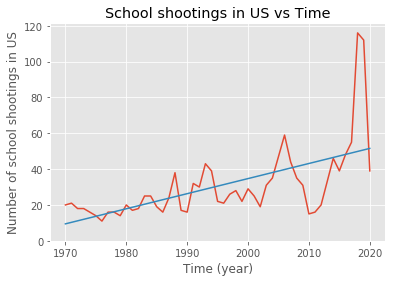

In [16]:
plot_annual_readings(df, [0, 121, 20], "School shootings in US vs Time", "Time (year)", "Number of school shootings in US", "num.png")


0.20470588235293932

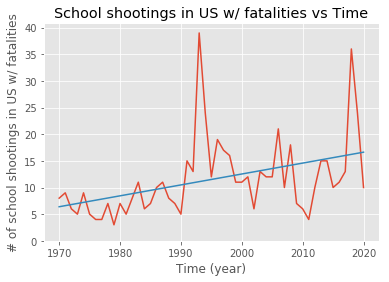

In [19]:
plot_annual_readings(high_death_count_df, [0, 41, 5], "School shootings in US w/ fatalities vs Time", "Time (year)", "# of school shootings in US w/ fatalities", "numfatal.png")



0.3633484162895902

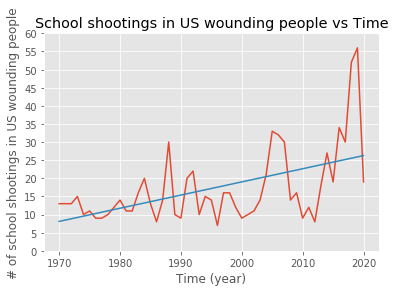

In [8]:
plot_annual_readings(wounded_df, [0, 61, 5], "School shootings in US wounding people vs Time", "Time (year)", "# of school shootings in US wounding people", "numwounded.png")


0.047894059223836855

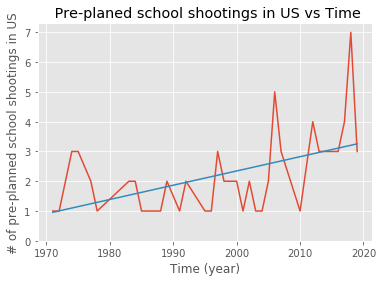

In [13]:
plot_annual_readings(premeditated_df, [0, 8, 1], " Pre-planed school shootings in US vs Time", "Time (year)", "# of pre-planned school shootings in US", "numpre.png")
